## Multi-class classification / oneVSall classification

In [1]:
#onevsall多分类器的实现
#load the datasets 导入手写字体数据集
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

digits = load_digits()
data = digits.data
target = digits.target

In [60]:
print(data.shape)
print(digits.keys())
print(digits.target)
print(digits.data[0])
print('the 15th image is:', target[15])

(1797, 64)
dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
[0 1 2 ..., 8 9 8]
[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]
the 15th image is: 5


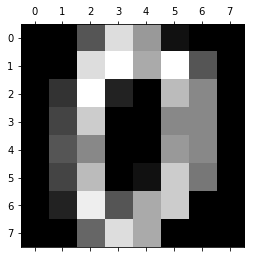

In [73]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

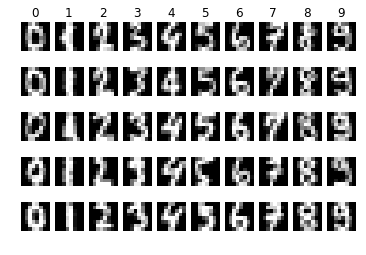

In [101]:
# randomly select 50 data points to display
# firstly intro the classes, including 10 digit images
classes = [str(i) for i in range(10)]
num_classes = len(classes)
samples_per_class = 5
for pos, cla in enumerate(classes):
    idxs = np.flatnonzero(target == pos)  # select all the target positions where value is in the class
    idxs = np.random.choice(idxs, samples_per_class, replace = False) # random select 5 points
    for k, idx in enumerate(idxs):
        plt_idx = k * num_classes + pos + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(digits.images[idx].astype('uint8'))
        plt.axis('off')
        if k == 0:
            plt.title(cla)
plt.show()

In [126]:
# regularized logistic function, to train the model
def H_Func(theta, x):      # theta.shape(1, m), x.shape(m, n_train)
    z = np.dot(theta, x)   # z.shape(1, n_train)
    h = 1 / (1 + exp(-z))
    return h

def cost_Func(theta, x, y, reg):   # y.shape(1, n_train)
    n_train = x.shape[1]
    h = H_Func(theta, x)   # h.shape(1, n_train)
    theta_1 = theta.reshape(1,-1)[0,1:]
    J = ((-y * np.log(h) - (1-y)*np.log(1-h)).sum())/n_train + reg/(2*n_train)*sum(theta_1 ** 2)
    grad = (np.dot((h-y), x.T) / n_train).reshape(1,-1)    # grad.shape(1, m)
    grad[0,1:] = grad[0,1:] + reg * theta_1 / n_train
    return J, grad

In [131]:
def grad_descent(theta, x, y, reg = 1, iters = 5000, alpha = 0.1):
    J_history = []
    for i in range(iters):
        n_train = x.shape[1]
        J, grad = cost_Func(theta, x, y, reg)
        J_history.append(J)
        theta = theta - alpha * grad
        if not i%200:
            print('iter is:',i,'the cost is:',J)
    return J_history, theta

*****

In [52]:
from sklearn.datasets import load_iris
iris = load_iris()     # iris is a built-in data package in sklearn, used in multiple-variable classification
print(iris.keys())
print(iris.target.shape)
print(iris.data.shape)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
(150,)
(150, 4)
